# Modeling and Simulation in Python

Chapter 3: Explain

Copyright 2017 Allen Downey

License: [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0)


In [31]:
# If you want the figures to appear in the notebook, 
# and you want to interact with them, use
# %matplotlib notebook

# If you want the figures to appear in the notebook, 
# and you don't want to interact with them, use
# %matplotlib inline

# If you want the figures to appear in separate windows, use
# %matplotlib qt5

# To switch from one to another, you have to select Kernel->Restart

%matplotlib inline

from modsim import *

Pandas is a module that provides tools for reading and processing data.  The `read_html` reads a web page from a file or the Internet and creates one DataFrame for each table on the page.

In [2]:
from pandas import read_html

The data directory contains a downloaded copy of https://en.wikipedia.org/wiki/World_population_estimates

In [8]:
filename = 'data/World_population_estimates.html'
tables = read_html(filename, header=0, index_col=0, decimal='M')

`tables` is a sequence of DataFrame objects.  We can select the DataFrame we want using the bracket operator.  The tables are numbered from 0, so `table2` is actually the third table on the page.

`head` selects the header and the first five rows.

In [9]:
table2 = tables[2]
table2.head()

,United States Census Bureau (2015)[18],Population Reference Bureau (1973–2015)[6],United Nations Department of Economic and Social Affairs (2015)[7],Maddison (2008)[8],HYDE (2007)[15],Tanton (1994)[9],Biraben (1980)[10],McEvedy & Jones (1978)[11],Thomlinson (1975)[12],Durand (1974)[13],Clark (1967)[14]
Year,,,,,,,,,,,
1950,2557628654,2.516000e+09,2525149000,2.544000e+09,2.527960e+09,2.400000e+09,2.527000e+09,2.500000e+09,2.400000e+09,NaN,2.486000e+09
1951,2594939877,NaN,2572850917,2.571663e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1952,2636772306,NaN,2619292068,2.617949e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1953,2682053389,NaN,2665865392,2.665959e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1954,2730228104,NaN,2713172027,2.716927e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN


`tail` selects the last five rows.

In [7]:
table2.tail()

,census,prb,un,maddison,hyde,tanton,biraben,mj,thomlinson,durand,clark
Year,,,,,,,,,,,
2011,6944055583,6.986951e+09,6997998760,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012,7022349283,7.057075e+09,7080072417,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013,7101027895,7.136796e+09,7162119434,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014,7178722893,7.238184e+09,7243784000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015,7256490011,7.336435e+09,7349472000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Long column names are awkard to work with, but we can replace them with abbreviated names.

In [8]:
table2.columns = ['census', 'prb', 'un', 'maddison', 
                  'hyde', 'tanton', 'biraben', 'mj', 
                  'thomlinson', 'durand', 'clark']

Here's what the DataFrame looks like now.  

Some of the values use scientific notation; for example, `2.544000e+09` is shorthand for $2.544 \cdot 10^9$ or 2.544 billion.

`NaN` is a special value that indicates missing data.

In [19]:
table2

,census,prb,un,maddison,hyde,tanton,biraben,mj,thomlinson,durand,clark
Year,,,,,,,,,,,
1950,2557628654,2.516000e+09,2525149000,2.544000e+09,2.527960e+09,2.400000e+09,2.527000e+09,2.500000e+09,2.400000e+09,NaN,2.486000e+09
1951,2594939877,NaN,2572850917,2.571663e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1952,2636772306,NaN,2619292068,2.617949e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1953,2682053389,NaN,2665865392,2.665959e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1954,2730228104,NaN,2713172027,2.716927e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1955,2782098943,NaN,2761650981,2.769074e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1956,2835299673,NaN,2811572031,2.822502e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1957,2891349717,NaN,2863042795,2.879934e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1958,2948137248,NaN,2916030167,2.939254e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can use dot notatio to select a column from a DataFrame.  The result is a Series.

In [10]:
census = table2.census
census

Year
1950    2557628654
1951    2594939877
1952    2636772306
1953    2682053389
1954    2730228104
1955    2782098943
1956    2835299673
1957    2891349717
1958    2948137248
1959    3000716593
1960    3043001508
1961    3083966929
1962    3140093217
1963    3209827882
1964    3281201306
1965    3350425793
1966    3420677923
1967    3490333715
1968    3562313822
1969    3637159050
1970    3712697742
1971    3790326948
1972    3866568653
1973    3942096442
1974    4016608813
1975    4089083233
1976    4160185010
1977    4232084578
1978    4304105753
1979    4379013942
           ...    
1986    4940571232
1987    5027200492
1988    5114557167
1989    5201440110
1990    5288955934
1991    5371585922
1992    5456136278
1993    5538268316
1994    5618682132
1995    5699202985
1996    5779440593
1997    5857972543
1998    5935213248
1999    6012074922
2000    6088571383
2001    6165219247
2002    6242016348
2003    6318590956
2004    6395699509
2005    6473044732
2006    6551263534
2007   

A Series object has two parts, `values` and `index`.

The `values` part is an array.

In [11]:
census.values

array([2557628654, 2594939877, 2636772306, 2682053389, 2730228104,
       2782098943, 2835299673, 2891349717, 2948137248, 3000716593,
       3043001508, 3083966929, 3140093217, 3209827882, 3281201306,
       3350425793, 3420677923, 3490333715, 3562313822, 3637159050,
       3712697742, 3790326948, 3866568653, 3942096442, 4016608813,
       4089083233, 4160185010, 4232084578, 4304105753, 4379013942,
       4451362735, 4534410125, 4614566561, 4695736743, 4774569391,
       4856462699, 4940571232, 5027200492, 5114557167, 5201440110,
       5288955934, 5371585922, 5456136278, 5538268316, 5618682132,
       5699202985, 5779440593, 5857972543, 5935213248, 6012074922,
       6088571383, 6165219247, 6242016348, 6318590956, 6395699509,
       6473044732, 6551263534, 6629913759, 6709049780, 6788214394,
       6866332358, 6944055583, 7022349283, 7101027895, 7178722893,
       7256490011], dtype=int64)

The `index` part is yet another kind of object, an `Int64Index`.

In [12]:
census.index

Int64Index([1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
            1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
            1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
            1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
            1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
            2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
           dtype='int64', name='Year')

If you ever wonder what kind of object a variable refers to, you can use the `type` function.

The result indicates what type the object is, and the module where that type is defined.

DataFrame, Series, and Int64Index are defined by Pandas.

array is defined by NumPy.

In [13]:
type(table2)

pandas.core.frame.DataFrame

In [14]:
type(census)

pandas.core.series.Series

In [15]:
type(census.index)

pandas.core.indexes.numeric.Int64Index

In [16]:
type(census.values)

numpy.ndarray

This function plots the estimates generated by the US Censis and UN DESA, and labels the axes.

`1e9` is scientific notation for $1 \cdot 10^9$ or 1 billion.

In [17]:
def plot_estimates(table):
    """Plot world population estimates.
    
    table: DataFrame with columns 'un' and 'census'
    """
    un = table.un / 1e9
    census = table.census / 1e9
    
    plot(census, ':', color='darkblue', label='US Census')
    plot(un, '--', color='green', label='UN DESA')
    
    decorate(xlabel='Year',
             ylabel='World population (billion)')

Now we can plot the estimates.

Saving figure to file chap03-fig01.pdf


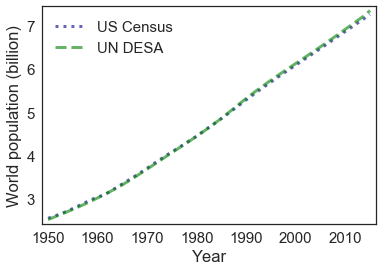

In [18]:
newfig()
plot_estimates(table2)
savefig('chap03-fig01.pdf')

From here on, we will work in units of billions.

In [17]:
un = table2.un / 1e9

In [18]:
census = table2.census / 1e9

This expression computes the elementwise differences between the series, then divides through by the UN value to produce relative errors, then finds the largest element.

So the largest relative error between the estimates is about 1.3%.

In [19]:
max(abs(census - un) / un) * 100

**Exercise:** Break down that expression into smaller steps and display the intermediate results, to make sure you understand how it works.

Where in the series is the largest relative error between the two estimates, near the beginning or the end?

When I computed relative errors, I used `un` as the denominator.  But that was an arbitraty choice.  What happens if we use `census` instead?  How much difference does it make.

In [2]:
# Solution goes here
from modsim import *
from pandas import read_html
file_name = 'data/World_population_estimates.html'
tables = read_html(file_name, header = 0, index_col = 0, decimal = 'M')
table2 = tables[2]
table2.columns = ['census', 'prb', 'un', 'maddison', 
                  'hyde', 'tanton', 'biraben', 'MJ', 
                  'thomlinson', 'durand', 'Clark']
census = table2.census / 1e9
def plot_population(table):
    years = table.index
    census = table.census / 1e9
    un = table.un / 1e9
    
    plot(years, census, 'r--', label = "US Census")
    plot(years, un, 'b:', label = "UN Estimates")
    
    legend(loc = 'lower right')
    decorate(
             xlabel = 'Years',
             ylabel = 'Number of people')
    
newfig()
plot_population(table2)

In [59]:
# Solution goes here
dif = abs(table2.census - table2.un)
dif

Year
1950    32479654
1951    22088960
1952    17480238
1953    16187997
1954    17056077
1955    20447962
1956    23727642
1957    28306922
1958    32107081
1959    30320779
1960    16998566
1961     1136663
1962      978314
1963     8649605
1964    17462474
1965    21303314
1966    23202676
1967    21811991
1968    20638931
1969    21050301
1970    21525126
1971    23572603
1972    23695042
1973    22914110
1974    21303891
1975    18062799
1976    14049160
1977    11267841
1978     8440928
1979     7486071
          ...   
1986    12805478
1987    18115379
1988    23657521
1989    28559890
1990    31860733
1991    37322802
1992    38763292
1993    40596793
1994    42404214
1995    42619427
1996    41576157
1997    40715794
1998    40090409
1999    39403088
2000    39129045
2001    38927779
2002    38837469
2003    39400793
2004    40006086
2005    41049873
2006    41964443
2007    43192178
2008    44599448
2009    46507539
2010    49851124
2011    53943177
2012    57723134
2013    6

In [60]:
# Solution goes here
percent = dif / table2.un * 100
percent

Year
1950    1.286247
1951    0.858540
1952    0.667365
1953    0.607232
1954    0.628640
1955    0.740425
1956    0.843928
1957    0.988701
1958    1.101054
1959    1.020766
1960    0.561750
1961    0.036871
1962    0.031146
1963    0.270201
1964    0.535045
1965    0.639908
1966    0.682939
1967    0.628856
1968    0.582745
1969    0.582126
1970    0.583151
1971    0.625807
1972    0.616597
1973    0.584666
1974    0.533223
1975    0.443692
1976    0.338849
1977    0.266959
1978    0.196499
1979    0.171246
          ...   
1986    0.258520
1987    0.359053
1988    0.460423
1989    0.546078
1990    0.598794
1991    0.690025
1992    0.705441
1993    0.727689
1994    0.749047
1995    0.742263
1996    0.714242
1997    0.690252
1998    0.670935
1999    0.651132
2000    0.638560
2001    0.627448
2002    0.618347
2003    0.619705
2004    0.621627
2005    0.630170
2006    0.636478
2007    0.647257
2008    0.660376
2009    0.680460
2010    0.720789
2011    0.770837
2012    0.815290
2013    0

In [61]:
# Solution goes here
max_error = max(percent)
max_error

1.2862470293832167

### Constant growth

We can select an element from a series using bracket notation and one of the elements from the index.  Here's the first element:

In [3]:
census[1950]

2.5576286540000002

And the last element.

In [18]:
census[table2.index[-1]]

7.2564900110000004

But we can get the first and last years from the index itself:

In [19]:
first_year = census.index[0]
last_year = census.index[-1]
first_year, last_year

(1950, 2015)

And use them to look up the first and last elements.

Then we can compute the average annual growth in billions of people per year.

In [27]:
total_growth = census[last_year] - census[first_year]
elapsed_time = last_year - first_year
annual_growth = total_growth / elapsed_time
annual_growth

Now let's create a `TimeSeries` to contain values generated by a linear growth model.

In [28]:
results = TimeSeries()

Initially the Series is empty, but we can initialize it so the starting value, in 1950, is the 1950 population estimated by the US Census.

In [29]:
results[1950] = census[1950]
results

After that, the population in the model grows by a constant amount each year.

In [30]:
for t in linrange(1950, 2015):
    results[t+1] = results[t] + annual_growth

Here's what the results looks like, compared to the actual data.

In [31]:
newfig()
plot_estimates(table2)
plot(results, '--', color='gray', label='model')
decorate(xlabel='Year', ylabel='World population (billion)')
savefig('chap03-fig02.pdf')

The model fits the data pretty well after 1990, but not so well before.

**Exercise:**  Try fitting the model using data from 1965 to the present, and see if that does a better job.

Hint: Copy the code from above and make a few changes.

Make sure your model starts in 1950, even though the estimated annual growth is based on later data.  You might have to shift the first value in the series up or down to match the data.

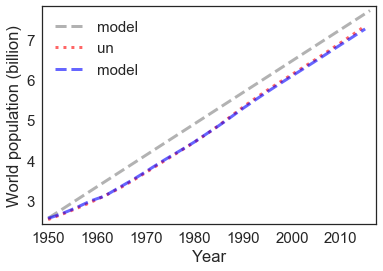

In [33]:
# Solution goes here
%matplotlib inline
from modsim import*
from pandas import read_html
file_name = 'data/World_population_estimates.html'
tables = read_html(file_name, header = 0, index_col = 0, decimal = 'M')
table2 = tables[2]
table2.columns = ['census', 'prb', 'un', 'maddison', 
                  'hyde', 'tanton', 'biraben', 'MJ', 
                  'thomlinson', 'durand', 'Clark']
census = table2.census / 1e9
un = table2.un / 1e9
first_year = table2.index[15]                        #1965
last_year = table2.index[-1]
elapsed_year = last_year - first_year
total_growth = census[last_year] - census[first_year]
annual_growth = total_growth / elapsed_year

results = TimeSeries()
results[1950] = census[1950]
for year in linrange(1950, last_year):
    results[year+1] = results[year] + annual_growth

newfig()
plot(results, '--', color='gray', label='model')
plot(un, ':', color='red', label='un')
plot(census, '--', color='blue', label='model')
decorate(xlabel='Year', ylabel='World population (billion)')

### Now with system objects

We can rewrite the code from the previous section using system objects.

In [33]:
t0 = census.index[0]
t_end = census.index[-1]
total_growth = census[t_end] - census[t0]
elapsed_time = t_end - t0
annual_growth = total_growth / elapsed_time

Here's the system object.

In [34]:
system = System(t0=t0, 
                t_end=t_end,
                p0=census[t0],
                annual_growth=annual_growth)

And we can encapsulate the code tha runs the model in a function that stores the resulting Series as a new system variable.

In [35]:
def run_simulation1(system):
    """Runs the constant growth model.
    
    Adds TimeSeries to `system` as `results`.
    
    system: system object
    """
    results = TimeSeries()
    results[system.t0] = system.p0
    for t in linrange(system.t0, system.t_end):
        results[t+1] = results[t] + system.annual_growth
    system.results = results

We can also encapsulate the code that plots the results.

In [36]:
def plot_results(system, title=None):
    """Plot the estimates and the model.
    
    system: System object with `results`
    """
    newfig()
    plot_estimates(table2)
    plot(system.results, '--', color='gray', label='model')
    decorate(xlabel='Year', 
             ylabel='World population (billion)',
             title=title)

Here's how we run it.

In [37]:
run_simulation1(system)
plot_results(system, title='Constant growth model')

`plot_results` uses `decorate`, which takes parameters that specify the title of the figure, labels for the $x$ and $y$ axis, and limits for the axes.  To read the documentation of `decorate`, run the cells below.

In [34]:
help(decorate)

Help on function decorate in module modsim:

decorate(**kwargs)
    Decorate the current axes.
    
    Call decorate with keyword arguments like
    
    decorate(title='Title',
             xlabel='x',
             ylabel='y')
    
    The keyword arguments can be any of the axis properties
    defined by Matplotlib.  To see the list, run plt.getp(plt.gca())
    
    In addition, you can use `legend=False` to suppress the legend.
    
    And you can use `loc` to indicate the location of the legend
    (the default value is 'best')



In [39]:
plt.getp(plt.gca())

**Exercise:** The constant growth model doesn't make a lot of sense, because it seems like the number of deaths and births should depend on the size of the population.  As a small improvement, let's write a version of `run_simulation1` where the number of deaths is proportional to the size of the population, but the number of births is constant.  This model doesn't make a lot of sense, either, but it's a good exercise.

Write a function called `run_simulation1b` that implements a model where the number of births is constant, but the number of deaths is proportional to the current size of the population.  Set the death rate to `0.01`, which means that 1% of the population dies each year; then choose the number of annual births to make the model fit the data as well as you can.

Hint: It probably won't fit very well.

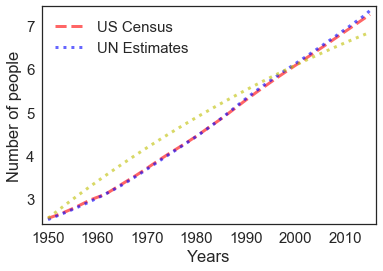

In [13]:
# Solution goes here
%matplotlib inline
from modsim import *
from pandas import read_html
file_name = 'data/World_population_estimates.html'
tables = read_html(file_name, header = 0, index_col = 0, decimal = 'M')
table2 = tables[2]
table2.columns = ['census', 'prb', 'un', 'maddison', 
                  'hyde', 'tanton', 'biraben', 'MJ', 
                  'thomlinson', 'durand', 'Clark']
census = table2.census / 1e9
un = table2.un / 1e9
years = table2.index
def plot_population(table):
    years = table.index
    census = table.census / 1e9
    un = table.un / 1e9
    
    plot(years, census, 'r--', label = "US Census")
    plot(years, un, 'b:', label = "UN Estimates")
    
    legend(loc = 'lower right')
    decorate(
             xlabel = 'Years',
             ylabel = 'Number of people')

annual_growth = 0.078121284360000015
pop_model = System(t0 = table2.index[0],
                   t_end = table2.index[-1],
                   p0 = census[table2.index[0]],
                   annual_growth = 0.115)

def run_simulation1b(system = pop_model):
    d_rate=0.01
    results = TimeSeries()
    results[system.t0] = system.p0
    for year in linrange(system.t0, system.t_end):
        if year < 2015:
            results[year+1] = results[year] + system.annual_growth - results[year]* d_rate
    return results

run_simulation1b(pop_model)
newfig()
plot_population(table2)
new_result = run_simulation1b()
plot(years, new_result, 'y:')

In [3]:
# Solution goes here

## Proportional death, proportional birth

Now let's get to a more realistic model where the number of births and deaths is proportional to the current population.

In [4]:
def run_simulation2(system):
    """Runs the constant growth model.
    
    Adds TimeSeries to `system` as `results`.
    
    system: system object
    """
    results = TimeSeries()
    results[system.t0] = system.p0
    for t in linrange(system.t0, system.t_end):
        births = system.birth_rate * results[t]
        deaths = system.death_rate * results[t]
        results[t+1] = results[t] + births - deaths
    system.results = results

I kept the death rate at 1% and chose the birth rate to fit the data.

In [5]:
system.death_rate = 0.01
system.birth_rate = 0.027

NameError: name 'system' is not defined

Here's what it looks like.

In [ ]:
run_simulation2(system)
plot_results(system, title='Proportional model')
savefig('chap03-fig03.pdf')

The model fits the data pretty well for the first 20 years, but not so well after that.

**Exercise:** In this implementation, we compute the number of deaths and births separately, but since they are both proportional to the current population, we can combine them.

Write a function called `run_simulation2b` that implements a model with a single parameter, `alpha`, that represents the net growth rate, which is the difference between the birth and death rates.  For example, if `alpha=0.01`, the population should grow by 1% per year.

Choose the value of `alpha` that fits the data best.

0.017


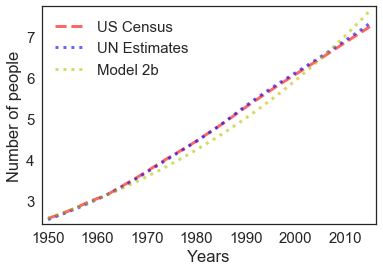

In [14]:
# Solution goes here
pop_model.death = 0.01
pop_model.birth = 0.027
un = table2.un / 1e9
def run_simulation2b(system):
    system.alpha = system.birth - system.death
    print(system.alpha)
    results = TimeSeries()
    results[system.t0] = census[system.t0]
    for year in linrange(system.t0, system.t_end):
        if year < 2015:
            results[year+1] = results[year]*(1+system.alpha)
    return results

def plot_model():
    plot(years, census, 'r--', label = "US Census")
    plot(years, un, 'b:', label = "UN Estimates")
    
    model2b = run_simulation2b(pop_model)
    plot(years, model2b, 'y:', label = 'Model 2b')
    
    legend(loc = 'best')
    decorate(
             xlabel = 'Years',
             ylabel = 'Number of people')

newfig()
plot_model()

In [46]:
# Solution goes here

### Factoring out the update function

The functions that run the model all look the same except the body of the loop.  So we can factor that part out into a function.

In [22]:
def update_func1(pop, system):
    """Compute the population next year.
    
    pop: current population
    t: current year
    system: system object containing parameters of the model
    
    returns: population next year
    """
    births = system.birth * pop
    deaths = system.death * pop
    return pop + births - deaths

Now the name `update_func1` refers to a function object.

In [23]:
update_func1

<function __main__.update_func1>

Which we can confirm by checking its type.

In [24]:
type(update_func1)

function

`run_simulation` takes the update function as a parameter and calls it just like any other function.

In [34]:
def run_simulation(system, update_func):
    """Simulate the system using any update function.
    
    Adds TimeSeries to `system` as `results`.

    system: System object
    update_func: function that computes the population next year
    """
    results = TimeSeries()
    results[system.t0] = system.p0
    for t in linrange(system.t0, system.t_end):
        results[t+1] = update_func(results[t], system)
    system.results = results

Here's how we use it.

0.017


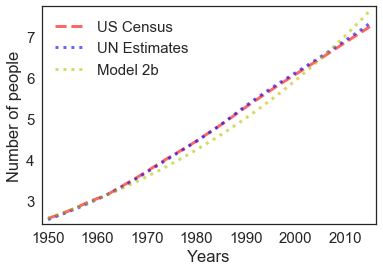

In [35]:
run_simulation(pop_model, update_func1)
newfig()
plot_model()

Remember not to put parentheses after `update_func1`.  What happens if you try?

In [ ]:
plot_results(system, title='Proportional model, factored')

**Exercise:** When you run `run_simulation`, it runs `update_func1` once for each year between `t0` and `t_end`.  To see that for yourself, add a print statement at the beginning of `update_func1` that prints the values of `t` and `pop`, then run `run_simulation` again.

In [39]:
%matplotlib inline
from modsim import *
from pandas import read_html
file_name = 'data/World_population_estimates.html'
tables = read_html(file_name, header = 0, index_col = 0, decimal = 'M')
table2 = tables[2]
table2.columns = ['census', 'prb', 'un', 'maddison', 
                  'hyde', 'tanton', 'biraben', 'MJ', 
                  'thomlinson', 'durand', 'Clark']
census = table2.census / 1e9
un = table2.un / 1e9
years = table2.index
def plot_population(table):
    years = table.index
    census = table.census / 1e9
    un = table.un / 1e9
    
    plot(years, census, 'r--', label = "US Census")
    plot(years, un, 'b:', label = "UN Estimates")
    
    legend(loc = 'lower right')
    decorate(
             xlabel = 'Years',
             ylabel = 'Number of people')

annual_growth = 0.078121284360000015
pop_model = System(t0 = table2.index[0],
                   t_end = table2.index[-1],
                   p0 = census[table2.index[0]],
                   annual_growth = 0.115)
pop_model.death = 0.01
pop_model.birth = 0.027
def run_simulation2b(system):
    system.alpha = system.birth - system.death
    print(system.alpha)
    results = TimeSeries()
    results[system.t0] = census[system.t0]
    for year in linrange(system.t0, system.t_end):
        if year < 2015:
            results[year+1] = results[year]*(1+system.alpha)
    return results

def plot_model():
    plot(years, census, 'r--', label = "US Census")
    plot(years, un, 'b:', label = "UN Estimates")
    
    model2b = run_simulation2b(pop_model)
    plot(years, model2b, 'y:', label = 'Model 2b')
    
    legend(loc = 'best')
    decorate(
             xlabel = 'Years',
             ylabel = 'Number of people')

def update_fun1(pop, t, system):
    print("This is Year", t)
    growth = pop*system.birth
    death = pop*system.death
    return pop + growth - death

def run_simulation3(system, update_function):
    system.alpha = system.birth - system.death
    print(system.alpha)
    results = TimeSeries()
    results[system.t0] = census[system.t0]
    for year in linrange(system.t0, system.t_end):
        if year < 2015:
            results[year+1] = update_function(results[year], year, system)
    return results

run_simulation3(pop_model, update_fun1)

0.017
This is Year 1950.0
This is Year 1951.0
This is Year 1952.0
This is Year 1953.0
This is Year 1954.0
This is Year 1955.0
This is Year 1956.0
This is Year 1957.0
This is Year 1958.0
This is Year 1959.0
This is Year 1960.0
This is Year 1961.0
This is Year 1962.0
This is Year 1963.0
This is Year 1964.0
This is Year 1965.0
This is Year 1966.0
This is Year 1967.0
This is Year 1968.0
This is Year 1969.0
This is Year 1970.0
This is Year 1971.0
This is Year 1972.0
This is Year 1973.0
This is Year 1974.0
This is Year 1975.0
This is Year 1976.0
This is Year 1977.0
This is Year 1978.0
This is Year 1979.0
This is Year 1980.0
This is Year 1981.0
This is Year 1982.0
This is Year 1983.0
This is Year 1984.0
This is Year 1985.0
This is Year 1986.0
This is Year 1987.0
This is Year 1988.0
This is Year 1989.0
This is Year 1990.0
This is Year 1991.0
This is Year 1992.0
This is Year 1993.0
This is Year 1994.0
This is Year 1995.0
This is Year 1996.0
This is Year 1997.0
This is Year 1998.0
This is Year 1

,value
1950,2.557629
1951,2.601108
1952,2.645327
1953,2.690298
1954,2.736033
1955,2.782545
1956,2.829849
1957,2.877956
1958,2.926881
1959,2.976638


### Combining birth and death

Since births and deaths get added up, we don't have to compute them separately.  We can combine the birth and death rates into a single net growth rate.

In [53]:
def update_func1b(pop, t, system):
    """Compute the population next year.
    
    pop: current population
    t: current year
    system: system object containing parameters of the model
    
    returns: population next year
    """
    net_growth = system.alpha  * pop
    return pop + net_growth

Here's how it works:

In [54]:
system.alpha = system.birth_rate - system.death_rate

run_simulation(system, update_func1b)
plot_results(system, title='Proportional model, combined birth and death')

**Exercise:** Maybe the reason the proportional model doesn't work very well is that the growth rate, `alpha`, might be changing over time.  So let's try a model with different growth rates before and after 1980 (as an arbitrary choice).

Write a function called `update_func1c` that takes `pop`, `t`, and `system` as parameters.  The system object, `system`, should contains two parameters: the growth rate before 1980, `alpha1`, and the growth rate after 1980, `alpha2`.  It should compute and return the simulated population one year later.

Note: Don't forget the `return` statement.

In [46]:
# Solution goes here
def update_func1b(pop,t,system):
    system.net_growth = system.alpha * pop
    return pop + system.net_growth

#run_simulation3(pop_model, update_func1b)

0.017


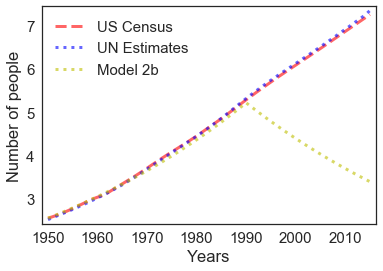

In [13]:
# Solution goes here
def update_func1c(pop, t, system):
    if t < 1990:
        system.alpha = 0.018
    if t >= 1990:
        system.alpha = -0.017
    system.net_growth = system.alpha * pop
    return pop + system.net_growth

def plot_model(run_simulation):
    plot(years, census, 'r--', label = "US Census")
    plot(years, un, 'b:', label = "UN Estimates")
    
    model2b = run_simulation
    plot(years, model2b, 'y:', label = 'Model 2b')
    
    legend(loc = 'best')
    decorate(
             xlabel = 'Years',
             ylabel = 'Number of people')
    
newfig()

plot_model(run_simulation3(pop_model, update_func1c))

### Quadratic growth

Here's the implementation of the quadratic growth model.

In [57]:
def update_func2(pop, t, system):
    """Compute the population next year.
    
    pop: current population
    t: current year
    system: system object containing parameters of the model
    
    returns: population next year
    """
    net_growth = system.alpha * pop + system.beta * pop**2
    return pop + net_growth

And here are the results.  Can you find values for the parameters that make the model fit better?

In [58]:
system.alpha = 0.025
system.beta = -0.0018

run_simulation(system, update_func2)
plot_results(system, title='Quadratic model')
savefig('chap03-fig04.pdf')

To understand the quadratic model better, let's plot net growth as a function of population.

In [3]:
pop_array = linspace(0.001, 15, 100)
net_growth_array = system.alpha * pop_array + system.beta * pop_array**2

NameError: name 'system' is not defined

Here's what it looks like.  Remember that the x axis is population now, not time.

The function `sns.set` sets the style for the plots.  I added a grid to this one to make it easier to read.

In [4]:
newfig()
sns.set(style='whitegrid', font_scale=1.5)
plot(pop_array, net_growth_array, '-')
decorate(xlabel='Population (billions)',
         ylabel='Net growth (billions)',
         legend=False)
#savefig('chap03-fig05.pdf')

NameError: name 'net_growth_array' is not defined

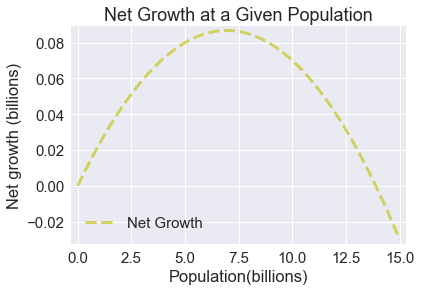

In [14]:
pop_model.alpha = 0.025
pop_model.beta = -0.0018
pop_array = linspace(0.001, 15, 100)
net_growth_array = pop_array * pop_model.alpha + pop_array**2 * pop_model.beta
newfig()
sns.set(style='darkgrid', font_scale = 1.5)
plot(pop_array, net_growth_array, 'y--', label = 'Net Growth')
decorate(title = 'Net Growth at a Given Population',
         xlabel = 'Population(billions)',
         ylabel = 'Net growth (billions)',
         legend = True)

Using `sns.set` to reset the plot style.

In [8]:
sns.set(style='white', font_scale=1.5)

In the book we found that the net growth is 0 when the population is $-\alpha/\beta$:

In [62]:
-system.alpha / system.beta

This is the equilibrium the population tends toward.

**Exercise:** In the book, I presented a different way to parameterize the quadratic model:

$ \Delta p = r p (1 - p / K) $

where $r=\alpha$ and $K=-\alpha/\beta$.  Write a version of `update_func2` that implements this version of the model.  Test it by computing system variables `r` and `K` equivalent to `alpha` and `beta`, and confirm that you get the same results. 

In [18]:
# Solution goes here
%matplotlib inline
from modsim import *
from pandas import read_html
file_name = 'data/World_population_estimates.html'
tables = read_html(file_name, header = 0, index_col = 0, decimal = 'M')
table2 = tables[2]
table2.columns = ['census', 'prb', 'un', 'maddison', 
                  'hyde', 'tanton', 'biraben', 'MJ', 
                  'thomlinson', 'durand', 'Clark']
census = table2.census / 1e9
un = table2.un / 1e9
years = table2.index

pop_model = System(t0 = table2.index[0],
                   t_end = table2.index[-1],
                   p0 = census[table2.index[0]],
                   annual_growth = 0.115)

def run_simulation3a(system, update_function):
    results = TimeSeries()
    results[system.t0] = census[system.t0]
    for year in linrange(system.t0, system.t_end):
        if year < 2015:
            results[year+1] = update_function(results[year], year, system)
    return results

def update_function2b(pop, t, system):
    r = system.alpha
    K = -system.alpha / system.beta
    system.net_growth = r*pop*(1-pop/K)
    return pop+system.net_growth

In [19]:
# Solution goes here
def plot_model():
    plot(years, census, 'r--', label = "US Census")
    plot(years, un, 'b:', label = "UN Estimates")
    
    quad_model = run_simulation3a(pop_model, update_function2b)
    plot(years, quad_model, 'y-', label = 'Quadratic Model')
    
    legend(loc = 'best')
    decorate(
             xlabel = 'Years',
             ylabel = 'Number of people')

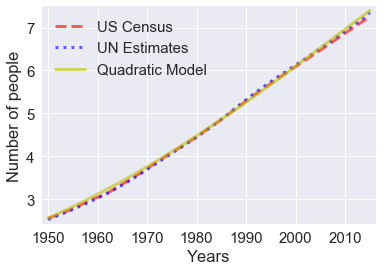

In [20]:
# Solution goes here
pop_model.alpha = 0.025
pop_model.beta = -0.0018
#pop_array = linspace(0.001, 15, 100)
#net_growth_array = pop_array * pop_model.alpha + pop_array**2 * pop_model.beta
#pop_array = run_simulation3a(pop_model, update_function2b)
#newfig()
sns.set(style='darkgrid', font_scale = 1.5)
#plot(pop_array, pop_array, 'y--', label = 'Net Growth')
#decorate(title = 'Net Growth at a Given Population',
#         xlabel = 'Population(billions)',
#         ylabel = 'Net growth (billions)',
#         legend = True)
plot_model()

**Exercise:** On the Wikipedia page about world population estimates, the first table contains estimates for prehistoric populations.  The following cells process this table and plot some of the results.

Select `table1`, which is the second table on the page.

In [21]:
table1 = tables[1]
table1.head()

,Population Reference Bureau (1973–2015)[6],United Nations Department of Economic and Social Affairs (2015)[7],Maddison (2008)[8],HYDE (2010)[citation needed],Tanton (1994)[9],Biraben (1980)[10],McEvedy & Jones (1978)[11],Thomlinson (1975)[12],Durand (1974)[13],Clark (1967)[14]
Year,,,,,,,,,,
-10000,NaN,NaN,NaN,2M[15],NaN,NaN,4.0,1–10M,NaN,NaN
-9000,NaN,NaN,NaN,4.,NaN,NaN,NaN,NaN,NaN,NaN
-8000,5.0,NaN,NaN,5.,NaN,NaN,NaN,NaN,5–10M,NaN
-7000,NaN,NaN,NaN,8.,NaN,NaN,NaN,NaN,NaN,NaN
-6000,NaN,NaN,NaN,11.,NaN,NaN,NaN,NaN,NaN,NaN


Not all agencies and researchers provided estimates for the same dates.  Again `NaN` is the special value that indicates missing data.

In [22]:
table1

,Population Reference Bureau (1973–2015)[6],United Nations Department of Economic and Social Affairs (2015)[7],Maddison (2008)[8],HYDE (2010)[citation needed],Tanton (1994)[9],Biraben (1980)[10],McEvedy & Jones (1978)[11],Thomlinson (1975)[12],Durand (1974)[13],Clark (1967)[14]
Year,,,,,,,,,,
-10000,NaN,NaN,NaN,2M[15],NaN,NaN,4.0,1–10M,NaN,NaN
-9000,NaN,NaN,NaN,4.,NaN,NaN,NaN,NaN,NaN,NaN
-8000,5.0,NaN,NaN,5.,NaN,NaN,NaN,NaN,5–10M,NaN
-7000,NaN,NaN,NaN,8.,NaN,NaN,NaN,NaN,NaN,NaN
-6000,NaN,NaN,NaN,11.,NaN,NaN,NaN,NaN,NaN,NaN
-5000,NaN,NaN,NaN,18M[15],NaN,NaN,5.0,5–20M,NaN,NaN
-4000,NaN,NaN,NaN,28.,NaN,NaN,7.0,NaN,NaN,NaN
-3000,NaN,NaN,NaN,45.,NaN,NaN,14.0,NaN,NaN,NaN
-2000,NaN,NaN,NaN,72.,NaN,NaN,27.0,NaN,NaN,NaN


Some of the estimates are in a form we can't read as numbers.  We could clean them up by hand, but for simplicity I'll replace any value that has an `M` in it with `NaN`.

In [23]:
table1.replace('M', np.nan, regex=True, inplace=True)

Again, we'll replace the long column names with more convenient abbreviations.

In [24]:
table1.columns = ['prb', 'un', 'maddison', 'hyde', 'tanton', 
                  'biraben', 'mj', 'thomlinson', 'durand', 'clark']

This function plots selected estimates.

In [25]:
def plot_prehistory(table):
    """Plots population estimates.
    
    table: DataFrame
    """
    plot(table.prb, 'ro', label='PRB')
    plot(table.un, 'co', label='UN')
    plot(table.hyde, 'yo', label='HYDE')
    plot(table.tanton, 'go', label='Tanton')
    plot(table.biraben, 'bo', label='Biraben')
    plot(table.mj, 'mo', label='McEvedy & Jones')

Here are the results.  Notice that we are working in millions now, not billions.

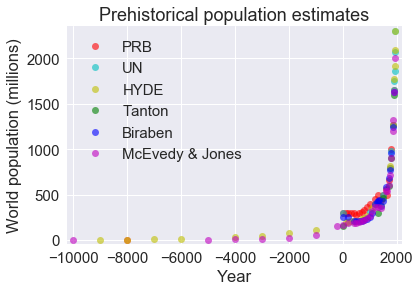

In [26]:
newfig()
plot_prehistory(table1)
decorate(xlabel='Year', 
         ylabel='World population (millions)',
         title='Prehistorical population estimates')

We can use `xlim` to zoom in on everything after Year 0.

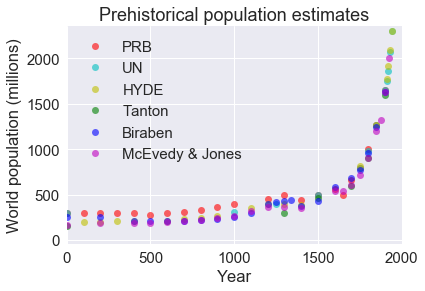

In [27]:
newfig()
plot_prehistory(table1)
decorate(xlim=[0, 2000], xlabel='Year', 
         ylabel='World population (millions)',
         title='Prehistorical population estimates')

See if you can find a model that fits these data well from Year -1000 to 1940, or from Year 0 to 1940.

How well does your best model predict actual population growth from 1950 to the present?

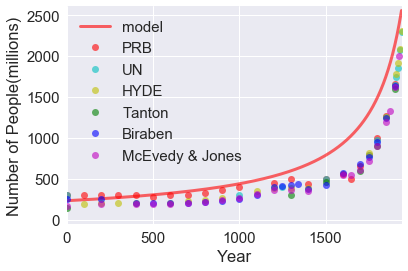

In [35]:
# Solution goes here
%matplotlib inline
from modsim import *
from pandas import read_html
file_name = 'data/World_population_estimates.html'
tables = read_html(file_name, header = 0, index_col = 0, decimal = 'M')
table1 = tables[1]
table1.replace('M', np.nan, regex=True, inplace=True)
table1.columns = ['prb', 'un', 'maddison', 'hyde', 'tanton', 
                  'biraben', 'mj', 'thomlinson', 'durand', 'clark']
table1.index[11] 
#Year 0 to 1940
avg_estimate = (table1.prb[1] + table1.un[1] + table1.tanton[1] + table1.biraben[1] + table1.mj[1])/5
estimate = System(t0 = table1.index[11],
                  t_end = table1.index[-1],
                  p0 = avg_estimate,
                  alpha = -0.000002,
                  beta = .000002)

def update_func3(pop, t, system):
    system.net_growth = pop * system.alpha + system.beta * pop**2
    return pop + system.net_growth

def plot_prehistory(table, system, update_func):
    """Plots population estimates.
    
    table: DataFrame
    """
    results = TimeSeries()
    results[system.t0] = system.p0
    for year in linrange(system.t0, system.t_end):
        if year < 1940:
            results[year+1] = update_func(results[year], year, system)
    plot(results, 'r-', label = 'model')
    plot(table.prb, 'ro', label='PRB')
    plot(table.un, 'co', label='UN')
    plot(table.hyde, 'yo', label='HYDE')
    plot(table.tanton, 'go', label='Tanton')
    plot(table.biraben, 'bo', label='Biraben')
    plot(table.mj, 'mo', label='McEvedy & Jones')
    
    
plot_prehistory(table1, estimate, update_func3)
decorate(xlim = [0, 1940],
         xlabel = 'Year',
         ylabel = 'Number of People(millions)')

In [40]:
# Solution goes here
years = table2.index
pop_model = System(t0 = table2.index[0],
                   t_end = table2.index[-1],
                   p0 = census[table2.index[0]],
                   alpha = -0.000002,
                   beta = .000002)

In [41]:
# Solution goes here
def plot_model():
    plot(years, census, 'r--', label = "US Census")
    plot(years, un, 'b:', label = "UN Estimates")
    
    prehis_model = run_simulation3a(pop_model, update_func3)
    plot(years, prehis_model, 'y-', label = 'Prehistorical Model')
    legend(loc = 'best')
    decorate(
             xlabel = 'Years',
             ylabel = 'Number of people(billions)')

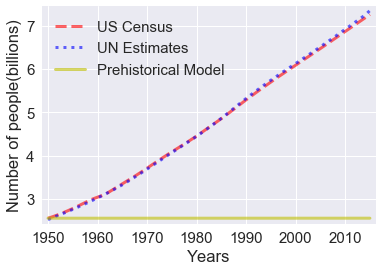

In [42]:
plot_model()